# Yijun Wang
### 2020/02/09

## Note for parameter
- Generation period value is taken from reference 1 and 2
- p value is taken from People's Daily Weibo. https://m.weibo.cn/u/2803301701
- R0 model refers to reference 3

## Reference
- 1. Li, Q., Guan, X., et al. (2020, January 29). Early Transmission Dynamics in Wuhan, China, of Novel Coronavirus–Infected Pneumonia. The New England Journal of Medicine. https://www.nejm.org/doi/full/10.1056/NEJMoa2001316#article_references

- 2. Wu, Joseph T., et al. (2020, January 28). Nowcasting and Forecasting the potential domestic and International Spread of the 2019-nCoV Outbreak Originating in Wuhan, China: a Modeling Study. Lancet.https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)30260-9/fulltext

- 3. Zhou Tao, Liu, Y., et al. (2020, January 29). Preliminary Prediction of the Basic Repreduction Number of the Novel Coronavirus 2019-nCoV http://kns.cnki.net/kcms/detail/51.1656.r.20200204.1640.002.html

In [1]:
# load data
import requests
import pandas as pd

url = 'https://lab.isaaclin.cn/nCoV/api/overall?latest=0'
r = requests.request('GET', url)
data = r.json()
df = pd.DataFrame.from_records(data['results'])
from datetime import datetime
import pandas

# date
df['t'] = pandas.to_datetime(df['updateTime']/1000,unit='s')
import datetime
df = df.resample('D', on = 't').max()
df['date'] = df['t'].dt.date
df

In [17]:
# R0
import math
import numpy
from array import *
import matplotlib.pyplot as plt

# generation period or serial interval (Wu, 2020; Li, 2020)
Tg = 7.5

# days: 疾病已爆发时间
import datetime
df['days'] = (df['updateTime']/1000 - datetime.datetime(2019,12,1,0,0,0).timestamp())/60/60/24

def R0Func(confirm, suspect,t):
    # confirm是确诊人数；susp是疑似人数；t是疾病已爆发时间
    # p为疑似病例转化为确诊病例的概率
    p = 41/59 # 人民日报微博
    # yt为实际预估感染人数
    Yt = suspect * p + confirm
    # lamda预估感染人数的增长率
    lamda = math.log(Yt)/t
    R0 = 1 + lamda * Tg + p * (1 - p) * pow(lamda * Tg, 2)
    return R0

df['R0'] = df.apply(lambda x: R0Func(x['confirmedCount'], x['suspectedCount'], x['days']), axis = 1)

,infectSource,passWay,dailyPic,summary,countRemark,confirmedCount,suspectedCount,curedCount,deadCount,seriousCount,...,remark1,remark2,remark3,remark4,remark5,updateTime,t,days,R0,date
t,,,,,,,,,,,,,,,,,,,,,
2020-01-24,野生动物，可能中华菊头蝠,未完全掌握，存在人传人、医务人员感染、一定范围社区传播,https://img1.dxycdn.com/2020/0124/981/33927191...,1,全国确诊923例，疑似1076例，治愈36例，死亡26例,1118,1076,37,41,NaN,...,病毒是否变异：存在可能,疫情是否扩散：是,,,,1579909901959,2020-01-24 23:51:41.959000111,55.327569,2.241880,2020-01-24
2020-01-25,野生动物，可能为某种菊头蝠,未完全掌握，存在人传人、医务人员感染、一定范围社区传播,https://img1.dxycdn.com/2020/0125/592/33928465...,,全国确诊1409例，疑似2032例\n死亡42例，治愈39例,1409,2032,40,42,NaN,...,病毒是否变异：存在可能,疫情是否扩散：是,,,,1579970035963,2020-01-25 16:33:55.963000059,56.023564,2.303404,2020-01-25
2020-01-26,野生动物，可能为某种菊头蝠,未完全掌握，存在人传人、医务人员感染、一定范围社区传播,https://img1.dxycdn.com/2020/0126/134/33930295...,,全国确诊2744例，疑似5794例\n死亡80例，治愈51例,2744,5794,51,80,NaN,...,病毒是否变异：存在可能,疫情是否扩散：是,,,,1580083105318,2020-01-26 23:58:25.318000078,57.332237,2.436068,2020-01-26
2020-01-27,野生动物，可能为中华菊头蝠,未完全掌握，存在人传人、医务人员感染、一定范围社区传播,https://img1.dxycdn.com/2020/0127/350/33932189...,,确诊2846例，疑似5794例\n死亡81例，治愈56例,2889,5794,59,82,NaN,...,易感人群: 暂时不明，病毒存在变异可能,潜伏期: 1~14 天均有，平均 10 天，潜伏期内存在传染性,,,,1580168827822,2020-01-27 23:47:07.822000027,58.324396,2.410957,2020-01-27
2020-01-28,野生动物，可能为中华菊头蝠,经呼吸道飞沫传播，亦可通过接触传播,https://img1.dxycdn.com/2020/0129/836/33935189...,,数据来自国家卫健委等官方渠道,5517,6973,101,131,NaN,...,易感人群: 对所有年龄组都易感,潜伏期: 一般为 3~7 天，最长不超过 14 天，潜伏期内存在传染性,,,,1580251164574,2020-01-28 22:39:24.573999882,59.277368,2.459936,2020-01-28
2020-01-29,野生动物，可能为中华菊头蝠,经呼吸道飞沫传播，亦可通过接触传播,https://img1.dxycdn.com/2020/0129/973/33935772...,,,7736,12167,124,170,NaN,...,易感人群: 人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期: 一般为 3~7 天，最长不超过 14 天，潜伏期内存在传染性,,,,1580341717135,2020-01-29 23:48:37.134999990,60.325430,2.512791,2020-01-29
2020-01-30,野生动物，可能为中华菊头蝠,经呼吸道飞沫传播，亦可通过接触传播,https://img1.dxycdn.com/2020/0130/177/33937691...,,,9066,12167,162,213,NaN,...,易感人群: 人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期: 一般为 3~7 天，最长不超过 14 天，潜伏期内存在传染性,,,,1580426854948,2020-01-30 23:27:34.947999954,61.310821,2.498140,2020-01-30
2020-01-31,野生动物，可能为中华菊头蝠,经呼吸道飞沫传播，亦可通过接触传播,https://img1.dxycdn.com/2020/0131/475/33940297...,,,11227,15238,214,214,NaN,...,易感人群: 人群普遍易感。老年人及有基础疾病者感染后病情较重，儿童及婴幼儿也有发病,潜伏期: 一般为 3~7 天，最长不超过 14 天，潜伏期内存在传染性,,,,1580514964993,2020-01-31 23:56:04.993000031,62.330613,2.508434,2020-01-31
2020-02-01,野生动物，可能为中华菊头蝠,经呼吸道飞沫传播，亦可通过接触传播,https://img1.dxycdn.com/2020/0201/693/33941457...,挺住，为中国加油！,这里是备注的全国总数备注阿未完全掌握，存未完全掌握，存在人传人、医务人员感染、\n一定范围社...,13858,17988,322,304,NaN,...,病毒是否变异：是,疫情是否扩散：是,是否有治愈人数：否,是否已经确定传播途径,,1580601183657,2020-02-01 23:53:03.657000065,63.328515,2.513654,2020-02-01


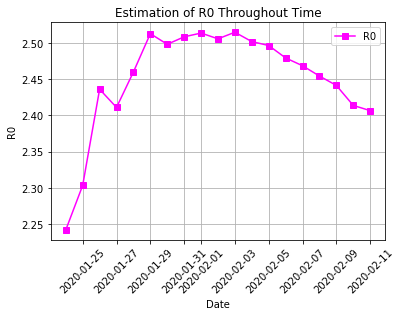

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


Timestamp('2020-02-03 00:00:00', freq='D')

In [25]:
# graph
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.plot(df['date'], df['R0'], color = 'magenta',label = 'R0', marker = 's')
plt.title('Estimation of R0 Throughout Time')
plt.legend()
plt.grid()
plt.xlabel('Date')
plt.ylabel('R0')
plt.xticks(rotation = 45)
plt.show()
